이 자료는 위키독스 '딥 러닝을 이용한 자연어 처리 입문'의 사전 훈련된 워드 임베딩 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/33793

## **09-08 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)**
---
  
이번에는 **케라스의 임베딩 층(embedding layer)** 과 **사전 훈련된 워드 임베딩(pre-trained word embedding)** 을 가져와서 사용하는 것을 비교해봅니다. 자연어 처리를 하려고 할 때 갖고 있는 훈련 데이터의 단어들을 임베딩 층(embedding layer)을 구현하여 임베딩 벡터로 학습하는 경우가 있습니다. 케라스에서는 이를 Embedding()이라는 도구를 사용하여 구현합니다.

위키피디아 등과 같은 방대한 코퍼스를 가지고 Word2vec, FastText, GloVe 등을 통해서 미리 훈련된 임베딩 벡터를 불러오는 방법을 사용하는 경우도 있습니다. 이는 현재 갖고 있는 훈련 데이터를 임베딩 층으로 처음부터 학습을 하는 방법과는 대조됩니다.

---
### **1. 케라스 임베딩 층(Keras Embedding layer)**

케라스는 훈련 데이터의 단어들에 대해 워드 임베딩을 수행하는 도구 Embedding()을 제공합니다. Embedding()은 인공 신경망 구조 관점에서 임베딩 층(embedding layer)을 구현합니다.  
  
#### **1) 임베딩 층은 룩업 테이블이다.**
임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다. 그리고 이 밀집 벡터를 임베딩 벡터라고 부릅니다.

정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 것은 어떤 의미일까요? 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있습니다. 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가집니다.


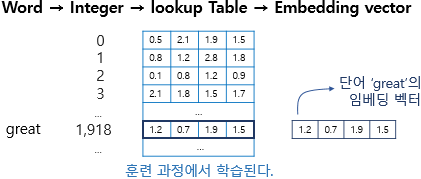

위의 그림은 단어 great이 정수 인코딩 된 후 테이블로부터 해당 인덱스에 위치한 임베딩 벡터를 꺼내오는 모습을 보여줍니다. 위의 그림에서는 임베딩 벡터의 차원이 4로 설정되어져 있습니다. 그리고 단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩이 되었고 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용합니다. 이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습됩니다.  
  
룩업 테이블의 개념을 이론적으로 우선 접하고, 처음 케라스를 배울 때 어떤 분들은 임베딩 층의 입력이 원-핫 벡터가 아니어도 동작한다는 점에 헷갈려 합니다. 앞서 NNLM이나 Word2Vec을 설명할 때 룩업 테이블을 언급하면서 입력을 원-핫 벡터로 가정하고 설명드렸기 때문인데, 케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 변환 후 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인코딩까지만 진행 후 임베딩 층의 입력으로 사용하여 룩업 테이블 결과인 임베딩 벡터를 리턴합니다.  
  
케라스의 임베딩 층 구현 코드를 봅시다.
  
```python
    vocab_size = 20000
    output_dim = 128
    input_length = 500

    v = Embedding(vocab_size, output_dim, input_length=input_length)
```

임베딩 층은 다음과 같은 세 개의 인자를 받습니다.

**vocab_size** = 텍스트 데이터의 전체 단어 집합의 크기입니다.  
**output_dim** = 워드 임베딩 후의 임베딩 벡터의 차원입니다.  
**input_length** = 입력 시퀀스의 길이입니다. 만약 갖고있는 각 샘플의 길이가 500개이라면 이 값은 500입니다.  
  
Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이때 각 sample은 정수 인코딩이 된 결과로 정수 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 실수 텐서를 리턴합니다. 케라스의 임베딩 층(embedding layer)을 사용하는 실습을 진행해보겠습니다.

#### **2) 임베딩 층 사용하기**
문장의 긍, 부정을 판단하는 감성 분류 모델을 만들어봅시다. 문장과 레이블 데이터를 만들었습니다. 긍정인 문장은 레이블 1, 부정인 문장은 레이블이 0입니다.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

케라스의 토크나이저를 사용하여 단어 집합을 만들고 그 크기를 확인합니다.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

16


각 문장에 대해서 정수 인코딩을 수행합니다.

In [ ]:
X_encoded = tokenizer.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


가장 길이가 긴 문장의 길이를 구합니다.

In [ ]:
max_len = max(len(l) for l in X_encoded)
print(max_len)

4


최대 길이로 모든 샘플에 대해서 패딩을 진행합니다.

In [ ]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


훈련 데이터에 대한 전처리가 끝났습니다. 전형적인 이진 분류 모델을 설계합니다. 출력층에 1개의 뉴런을 배치하고 활성화 함수로는 시그모이드 함수를, 그리고 손실 함수로 binary_crossentropy를 사용합니다. 그 후 100 에포크 학습합니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 2s - loss: 0.6845 - acc: 0.5714
Epoch 2/100
1/1 - 0s - loss: 0.6832 - acc: 0.5714
Epoch 3/100
1/1 - 0s - loss: 0.6818 - acc: 0.5714
Epoch 4/100
1/1 - 0s - loss: 0.6805 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6791 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.6777 - acc: 0.7143
Epoch 7/100
1/1 - 0s - loss: 0.6764 - acc: 0.7143
Epoch 8/100
1/1 - 0s - loss: 0.6750 - acc: 0.8571
Epoch 9/100
1/1 - 0s - loss: 0.6736 - acc: 0.8571
Epoch 10/100
1/1 - 0s - loss: 0.6723 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.6709 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.6695 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.6682 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.6668 - acc: 0.8571
Epoch 15/100
1/1 - 0s - loss: 0.6654 - acc: 0.8571
Epoch 16/100
1/1 - 0s - loss: 0.6640 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.6626 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.6612 - acc: 0.8571
Epoch 19/100
1/1 - 0s - loss: 0.6598 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.6583 - a

학습 과정에서 현재 각 단어들의 임베딩 벡터들의 값은 출력층의 가중치와 함께 학습됩니다.

---
### **2. 사전 훈련된 GloVe 사용하기**

케라스의 Embedding()을 사용하여 처음부터 임베딩 벡터값을 학습하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 가져와서 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 적은 상황이라면 케라스의 Embedding()으로 해당 문제를 풀기에 최적화 된 임베딩 벡터값을 얻는 것이 쉽지 않습니다. 이 경우 해당 문제에 특화된 것은 아니지만 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.  
  
사전 훈련된 GloVe와 Word2Vec 임베딩을 사용해서 모델을 훈련시키는 실습을 진행해봅시다.  
  
* GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip
* Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM  
  
훈련 데이터는 앞서 사용했던 데이터에 동일한 전처리까지 진행된 상태라고 가정하겠습니다.

In [ ]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

In [ ]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

glove.6B.100d.txt에 있는 모든 임베딩 벡터들을 불러옵니다. 파이썬의 자료구조 딕셔너리(dictionary)를 사용하며, 로드한 임베딩 벡터의 개수를 확인합니다.

In [ ]:
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    
    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


총 40만개의 임베딩 벡터가 존재합니다. 임의의 단어 'respectable'의 임베딩 벡터값과 크기를 출력해봅니다.

In [ ]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

벡터값이 출력되며 벡터의 차원 수는 100입니다. 풀고자 하는 문제의 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성합니다. 이 행렬의 값은 전부 0으로 채웁니다. 이 행렬에 사전 훈련된 임베딩 값을 넣어줄 것입니다.

In [ ]:
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
embedding_matrix = np.zeros((vocab_size, 100))
np.shape(embedding_matrix)

(16, 100)

기존 데이터의 각 단어와 맵핑된 정수값을 확인해봅시다.

In [ ]:
print(tokenizer.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


단어 'great'의 맵핑된 정수는 2입니다.

In [ ]:
print("단어 great의 맵핑된 정수 : ", tokenizer.word_index['great'])

2

사전 훈련된 GloVe에서 'great'의 벡터값을 확인합니다.

In [ ]:
print(embedding_dict['great'])

[-0.013786   0.38216    0.53236    0.15261   -0.29694   -0.20558
 -0.41846   -0.58437   -0.77355   -0.87866   -0.37858   -0.18516
 -0.128     -0.20584   -0.22925   -0.42599    0.3725     0.26077
 -1.0702     0.62916   -0.091469   0.70348   -0.4973    -0.77691
  0.66045    0.09465   -0.44893    0.018917   0.33146   -0.35022
 -0.35789    0.030313   0.22253   -0.23236   -0.19719   -0.0053125
 -0.25848    0.58081   -0.10705   -0.17845   -0.16206    0.087086
  0.63029   -0.76649    0.51619    0.14073    1.019     -0.43136
  0.46138   -0.43585   -0.47568    0.19226    0.36065    0.78987
  0.088945  -2.7814    -0.15366    0.01015    1.1798     0.15168
 -0.050112   1.2626    -0.77527    0.36031    0.95761   -0.11385
  0.28035   -0.02591    0.31246   -0.15424    0.3778    -0.13599
  0.2946    -0.31579    0.42943    0.086969   0.019169  -0.27242
 -0.31696    0.37327    0.61997    0.13889    0.17188    0.30363
 -1.2776     0.044423  -0.52736   -0.88536   -0.19428   -0.61947
 -0.10146   -0.26301  

단어 집합의 모든 단어에 대해서 사전 훈련된 GloVe의 임베딩 벡터들을 맵핑한 후 'great'의 벡터값이 의도한 인덱스의 위치에 삽입되었는지 확인해보겠습니다.

In [ ]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

embedding_matrix의 인덱스 2에서의 값을 확인합니다.

In [ ]:
embedding_matrix[2]

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

이전에 확인한 사전에 훈련된 GloVe에서의 'great'의 벡터값과 일치합니다. 이제 Embedding layer에 embedding_matrix를 초기값으로 설정합니다. 현재 실습에서 사전 훈련된 워드 임베딩을 100차원의 값인 것으로 사용하고 있기 때문에 임베딩 층의 output_dim의 인자값으로 100을 주어야 합니다. 그리고 사전 훈련된 워드 임베딩을 그대로 사용할 경우 추가 훈련을 하지 않는다는 의미에서 trainable의 인자값을 False로 선택할 수 있습니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)

In [ ]:
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.7021 - acc: 0.5714
Epoch 2/100
1/1 - 0s - loss: 0.6829 - acc: 0.5714
Epoch 3/100
1/1 - 0s - loss: 0.6644 - acc: 0.5714
Epoch 4/100
1/1 - 0s - loss: 0.6466 - acc: 0.5714
Epoch 5/100
1/1 - 0s - loss: 0.6294 - acc: 0.5714
Epoch 6/100
1/1 - 0s - loss: 0.6129 - acc: 0.5714
Epoch 7/100
1/1 - 0s - loss: 0.5969 - acc: 0.7143
Epoch 8/100
1/1 - 0s - loss: 0.5816 - acc: 0.7143
Epoch 9/100
1/1 - 0s - loss: 0.5668 - acc: 0.7143
Epoch 10/100
1/1 - 0s - loss: 0.5525 - acc: 0.7143
Epoch 11/100
1/1 - 0s - loss: 0.5386 - acc: 0.7143
Epoch 12/100
1/1 - 0s - loss: 0.5253 - acc: 0.7143
Epoch 13/100
1/1 - 0s - loss: 0.5124 - acc: 0.7143
Epoch 14/100
1/1 - 0s - loss: 0.4999 - acc: 0.8571
Epoch 15/100
1/1 - 0s - loss: 0.4878 - acc: 0.8571
Epoch 16/100
1/1 - 0s - loss: 0.4760 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.4647 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.4536 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4429 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.4325 - a

사전 훈련된 GloVe 임베딩에 대한 예제는 아래의 케라스 블로그 링크에도 기재되어 있습니다.  
  
* 링크 : https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

#### **2) 사전 훈련된 Word2Vec 사용하기**
구글의 사전 훈련된 Word2Vec 모델을 로드하여 word2vec_model에 저장 후 크기를 확인합니다.

In [ ]:
import gensim

In [ ]:
urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
print(word2vec_model.vectors.shape) # 모델의 크기 확인

(3000000, 300)


300의 차원을 가진 Word2Vec 벡터가 3,000,000개 있습니다. 모든 값이 0으로 채워진 임베딩 행렬을 만들어줍니다. 풀고자 하는 문제의 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성합니다. 이 행렬의 값은 전부 0으로 채웁니다. 이 행렬에 사전 훈련된 임베딩 값을 넣어줄 것입니다.

In [ ]:
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
embedding_matrix = np.zeros((vocab_size, 300))
np.shape(embedding_matrix)

(16, 300)

word2vec_model에서 특정 단어를 입력하면 해당 단어의 임베딩 벡터를 리턴받을텐데, 만약 word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None을 리턴하도록 하는 함수 get_vector()를 구현합니다.

In [ ]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

단어 집합으로부터 단어를 1개씩 호출하여 word2vec_model에 해당 단어의 임베딩 벡터값이 존재하는지 확인합니다. 만약 None이 아니라면 존재한다는 의미이므로 임베딩 행렬에 해당 단어의 인덱스 위치의 행에 임베딩 벡터의 값을 저장합니다.

In [ ]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

현재 풀고자하는 문제의 16개의 단어와 맵핑되는 임베딩 행렬이 완성됩니다. 제대로 맵핑이 됐는지 확인해볼까요? 기존에 word2vec_model에 저장되어 있던 단어 'nice'의 임베딩 벡터값을 확인해봅시다.

In [ ]:
print(word2vec_model['nice'])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

단어 'nice'의 맵핑된 정수를 확인합니다.

In [ ]:
print('단어 nice의 맵핑된 정수 :', tokenizer.word_index['nice'])

1의 값을 가지므로 embedding_matirx의 1번 인덱스에는 단어 'nice'의 임베딩 벡터값이 있어야 합니다.

값이 word2vec_model에서 확인했던 것과 동일한 것을 확인할 수 있습니다. 단어 집합에 있는 다른 단어들에 대해서도 확인해보세요. 이제 Embedding에 사전 훈련된 embedding_matrix를 입력으로 넣어주고 모델을 학습시켜보겠습니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

사전 훈련된 워드 임베딩을 이용한 텍스트 분류는 'NLP를 이용한 합성곱 신경망' 챕터의 의도 분류 실습( https://wikidocs.net/86083 )을 참고하세요.

마지막 편집일시 : 2022년 11월 14일 2:59 오후

In [ ]:
print(embedding_matrix[1])

In [ ]:
print(word2vec_model['great'])

[ 7.17773438e-02  2.08007812e-01 -2.84423828e-02  1.78710938e-01
  1.32812500e-01 -9.96093750e-02  9.61914062e-02 -1.16699219e-01
 -8.54492188e-03  1.48437500e-01 -3.34472656e-02 -1.85546875e-01
  4.10156250e-02 -8.98437500e-02  2.17285156e-02  6.93359375e-02
  1.80664062e-01  2.22656250e-01 -1.00585938e-01 -6.93359375e-02
  1.04427338e-04  1.60156250e-01  4.07714844e-02  7.37304688e-02
  1.53320312e-01  6.78710938e-02 -1.03027344e-01  4.17480469e-02
  4.27246094e-02 -1.10351562e-01 -6.68945312e-02  4.19921875e-02
  2.50000000e-01  2.12890625e-01  1.59179688e-01  1.44653320e-02
 -4.88281250e-02  1.39770508e-02  3.55529785e-03  2.09960938e-01
  1.52343750e-01 -7.32421875e-02  2.16796875e-01 -5.76171875e-02
 -2.84423828e-02 -3.60107422e-03  1.52343750e-01 -2.63671875e-02
  2.13623047e-02 -1.51367188e-01  1.04003906e-01  3.18359375e-01
 -1.85546875e-01  3.68652344e-02 -1.10839844e-01 -3.17382812e-02
 -1.01562500e-01 -1.21093750e-01  3.22265625e-01 -7.32421875e-02
 -1.52343750e-01  2.67578

In [ ]:
print(embedding_matrix[2])

[ 7.17773438e-02  2.08007812e-01 -2.84423828e-02  1.78710938e-01
  1.32812500e-01 -9.96093750e-02  9.61914062e-02 -1.16699219e-01
 -8.54492188e-03  1.48437500e-01 -3.34472656e-02 -1.85546875e-01
  4.10156250e-02 -8.98437500e-02  2.17285156e-02  6.93359375e-02
  1.80664062e-01  2.22656250e-01 -1.00585938e-01 -6.93359375e-02
  1.04427338e-04  1.60156250e-01  4.07714844e-02  7.37304688e-02
  1.53320312e-01  6.78710938e-02 -1.03027344e-01  4.17480469e-02
  4.27246094e-02 -1.10351562e-01 -6.68945312e-02  4.19921875e-02
  2.50000000e-01  2.12890625e-01  1.59179688e-01  1.44653320e-02
 -4.88281250e-02  1.39770508e-02  3.55529785e-03  2.09960938e-01
  1.52343750e-01 -7.32421875e-02  2.16796875e-01 -5.76171875e-02
 -2.84423828e-02 -3.60107422e-03  1.52343750e-01 -2.63671875e-02
  2.13623047e-02 -1.51367188e-01  1.04003906e-01  3.18359375e-01
 -1.85546875e-01  3.68652344e-02 -1.10839844e-01 -3.17382812e-02
 -1.01562500e-01 -1.21093750e-01  3.22265625e-01 -7.32421875e-02
 -1.52343750e-01  2.67578

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.7373 - acc: 0.4286
Epoch 2/100
1/1 - 0s - loss: 0.7183 - acc: 0.4286
Epoch 3/100
1/1 - 0s - loss: 0.6998 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6819 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6644 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.6475 - acc: 0.8571
Epoch 7/100
1/1 - 0s - loss: 0.6312 - acc: 0.8571
Epoch 8/100
1/1 - 0s - loss: 0.6153 - acc: 0.8571
Epoch 9/100
1/1 - 0s - loss: 0.5999 - acc: 0.8571
Epoch 10/100
1/1 - 0s - loss: 0.5850 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.5706 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.5566 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.5431 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.5300 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.5174 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.5051 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.4932 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.4817 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4705 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.4597 - a